In [1]:
# check for second point in task 7
import numpy as np
np.set_printoptions(precision=2, suppress=True)
x,y = 4,0
var1 = -2*x*np.exp(-x/2) + np.exp(-x/2)*(np.power(x,2)/4+np.power(y,2)/4) + 2*np.exp(-x/2)
var2 = 2*np.exp(-x/2)
var3 = -y * np.exp(-x/2)
a = np.array([[var1, var3], [var3, var2]])
w, v = np.linalg.eig(a)

print(f'Матрица Гёссе:\n{a}')
print(f'Собственные значения:\n{w}')
# седловая точка

Матрица Гёссе:
[[-0.27  0.  ]
 [ 0.    0.27]]
Собственные значения:
[-0.27  0.27]


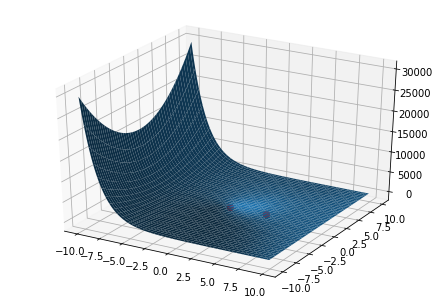

In [15]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

def makeData ():
    x = np.arange (-10, 10, 0.1)
    y = np.arange (-10, 10, 0.1)
    xgrid, ygrid = np.meshgrid(x, y)

    Ugrid = np.exp(-xgrid/2) * (np.power(xgrid,2) + np.power(ygrid, 2))
    return xgrid, ygrid, Ugrid

x, y, U = makeData()

fig = pylab.figure()
axes = Axes3D(fig)

axes.plot_surface(x, y, U)
axes.scatter(0, 0, c='r', s=40)
axes.scatter(4, 0, c='r', s=40)

pylab.show()

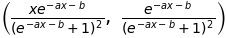

In [3]:
# task 8
from sympy import *
init_printing()
x,y,a,b = symbols('x y a b')
y=1 / (1+ Pow(E, -(a*x + b)))
diff(y,a), diff(y,b)

0.840070083318334 0.007837468730058653


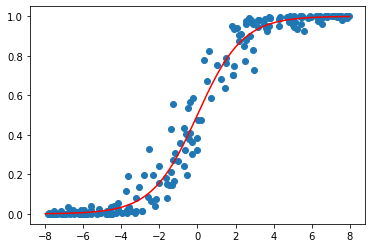

0.9888910842273227


In [4]:
from scipy.optimize import fsolve
import math
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(111)
xi = np.random.uniform(-8, 8, 200)
yi = 1/(1+np.exp(-np.random.uniform(0.5, 1.5, 200)*xi-np.random.uniform(-1, 1, 200)))

def equations(p):
    a, b = p
    return (np.sum(-2*(yi - 1/(1 + np.exp(-a*xi - b))) * (xi * np.exp(-a*xi - b)/np.power(np.exp(-a*xi-b) + 1,2))), 
            np.sum(-2*(yi - 1/(1 + np.exp(-a*xi - b))) * (np.exp(-a*xi - b)/np.power(np.exp(-a*xi-b) + 1,2))))

a, b =  fsolve(equations, (0, 0))
print(a, b)
x = np.linspace(-8,8,200)
y = 1 / (1 + np.exp(-a*x - b))
plt.plot(xi,yi, marker="o", ls="")
plt.plot(x,y, c='r')
plt.show()

n = 200
y_ = y.sum() / n
r = np.sqrt((((yi-y_)**2).sum() - ((yi - 1 / (1 + np.exp(-a*xi - b)))**2).sum())/((yi - y_)**2).sum())
print(r)